#### Errors in Regression


    -    difference between predicted continous variable and actual continuous variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("D:\DS WorkFlow\ML-Concepts\BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [6]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [7]:
x.shape

(506, 13)

In [8]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [9]:
y.shape

(506,)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [11]:
x

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.3)

In [25]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [26]:
lr.score(xtest,ytest)

0.753403751586959

In [27]:
ypred = lr.predict(xtest)

In [28]:
ypred

array([18.7269391 , 25.07345371, 16.86543571, 13.68005343, 16.32014597,
       36.49821909,  6.44086466, 21.42732337, 33.61587364, 25.36052508,
       17.8598962 , 26.86920009, 17.37553579, 26.02285151, 38.52653856,
       23.85411131, 21.62234901, 22.52339767, 19.08010999, 22.20661241,
       32.37490373, 28.4852143 , 28.1384942 , 22.87102335, 13.05284752,
       17.88029129, 25.52329236, 19.26966656, 16.60297474, 28.70464727,
       23.3494778 , 34.44225016, 32.14923671, 29.91389809, 21.13079303,
       19.66505651, 15.60421281, 16.9366442 , 20.26244789, 13.84832753,
       17.96952357, 13.6965269 , 20.39894787, 27.55071478, 14.96281361,
       13.52649808, 32.05630534, 12.75627298, 21.32815855, 22.68447186,
       20.19863268, 22.42965897, 20.58315259, 22.29131426, 39.61368699,
       34.82111192, 17.32950773, 14.14791923, 18.61221744, 28.97508375,
       16.98262918, 20.53048032, 15.18712029, 21.96196485, 31.41046629,
       27.04768697, 21.3544374 , 37.37683552, 17.69829521, 42.79

In [29]:
print(len(ypred))

152


In [30]:
print(len(xtest))

152


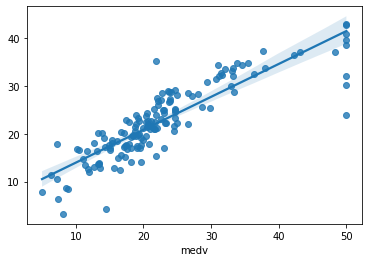

In [31]:
sns.regplot(x=ytest , y = ypred)
plt.show()

In [32]:
changes_in_prediction = list(ypred-ytest)

In [33]:
changes_in_prediction

[-1.173060899411059,
 2.1734537105512146,
 6.665435714368254,
 0.28005343077816924,
 3.2201459668280012,
 -5.80178090705278,
 -0.9591353403645417,
 0.22732337305904693,
 1.6158736439520425,
 -4.439474917048479,
 -2.940103803149082,
 2.969200091522687,
 0.07553579101452357,
 3.8228515141482937,
 -11.473461436459921,
 1.9541113126709462,
 0.6223490129570521,
 2.223397673260319,
 -0.5198900083452926,
 -1.0933875940201503,
 0.774903731287317,
 5.685214300987791,
 3.1384941967149693,
 5.4710233453667705,
 0.3528475228732262,
 0.08029128767480387,
 -3.1767076439920423,
 1.0696665636086706,
 6.202974743888744,
 5.004647273193697,
 4.149477795821564,
 -0.15774984349253884,
 -17.850763294406583,
 -2.9861019095883847,
 1.1307930257662768,
 0.46505650692381195,
 -0.99578718910095,
 -2.5633558049483227,
 3.1624478945374186,
 0.44832752730517456,
 5.269523569352831,
 0.39652690365613097,
 3.698947869641998,
 5.550714778847912,
 -1.237186394556911,
 2.226498080702237,
 0.9563053424379504,
 -0.843727

In [34]:
# MSE - Mean Squared Error
change_df = pd.DataFrame(data = {'actual_value':ytest,
                                 'predicted_value':ypred,
                                 "error":changes_in_prediction})
change_df.head()

,actual_value,predicted_value,error
361,19.9,18.726939,-1.173061
83,22.9,25.073454,2.173454
426,10.2,16.865436,6.665436
423,13.4,13.680053,0.280053
378,13.1,16.320146,3.220146


In [35]:
# squarion all the errors in the data
sq_error_lst = []
for i in changes_in_prediction:
    sq_error_lst.append(np.square(i))

In [36]:
sq_error_lst

[1.3760718737270825,
 4.723901031908843,
 44.428033262375834,
 0.07842992409062283,
 10.369340047678643,
 33.66066169344219,
 0.9199406011362053,
 0.05167591593894262,
 2.611047633218852,
 19.708937539102596,
 8.644210373291696,
 8.816149183498332,
 0.00570565572418978,
 14.614193699225902,
 131.64031733393296,
 3.8185510223085686,
 0.38731829392861705,
 4.9434972134594,
 0.2702856207772685,
 1.195496430757173,
 0.6004757927630064,
 32.3216616481561,
 9.850145822813541,
 29.932096445548208,
 0.12450137439777187,
 0.006446690876478112,
 10.091471455397473,
 1.1441865573023822,
 38.47689567332163,
 25.04649432908511,
 17.218165978016188,
 0.0248850131219205,
 318.64975019293337,
 8.916804614447399,
 1.2786928671216515,
 0.21627755463217754,
 0.9915921259775712,
 6.5707929827622635,
 10.001076685664152,
 0.20099757173957203,
 27.767878647965002,
 0.15723358532311857,
 13.682215342329075,
 30.810434556120622,
 1.5306301748767288,
 4.957293703370746,
 0.9145199079753655,
 0.7118752870152352

In [37]:
# mean quared error through numpy method
mse_numpy = np.mean(sq_error_lst)
print(mse_numpy)

23.893332122551325


In [38]:
from sklearn.metrics import mean_squared_error
mse_sklearn = mean_squared_error(ytest,ypred)
print(mse_sklearn)

23.893332122551325


In [40]:
# MAE - mean absolute error
abs_error_lst = []
for i in changes_in_prediction:
    abs_error_lst.append(abs(i))

In [41]:
mae_numpy = np.mean(abs_error_lst)
print(mae_numpy)

3.2422646891419484


In [42]:
from sklearn.metrics import mean_absolute_error
mae_sklearn = mean_absolute_error(ytest,ypred)
print(mae_sklearn)

3.2422646891419484


In [43]:
# RMSE or root mean squared error
rmse_numpy = np.sqrt(mse_numpy)
print(rmse_numpy)

4.888080617435777


In [44]:
rmse_sklearn = mean_squared_error(ytest,ypred,squared=False)
print(rmse_sklearn)

4.888080617435777


In [45]:
from sklearn.metrics import r2_score
r2_score_sklearn = r2_score(ytest,ypred)
print(r2_score_sklearn)

0.753403751586959


In [49]:
corr_matrix = np.corrcoef(ytest,ypred)
corr = corr_matrix[0,1]
r2_score_numpy = corr**2
print(r2_score_numpy)

0.9425005989342929
